# 📈 Blinkit Data Analysis Project


**Objective**:
Analyze Blinkit dataset to identify sales patterns, key performance metrics, and actionable insights.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('blinkit_data.csv')

##  🔍 Exploratory data analysis

In [56]:
print("Shape of the DataFrame:")

print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')


Shape of the DataFrame:
Rows: 8523
Columns: 12


In [57]:
df.sample(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
6494,Low Fat,NCL31,Others,1998,OUT019,Tier 1,Small,Grocery Store,0.210596,NaN,144.7470,4.0
4952,Low Fat,FDB15,Dairy,2020,OUT017,Tier 2,Small,Supermarket Type1,0.137585,10.895,262.2568,3.4
6629,Low Fat,FDB17,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.036672,13.150,182.5976,4.0
1798,Low Fat,DRD37,Soft Drinks,2000,OUT013,Tier 3,High,Supermarket Type1,0.013830,9.800,45.3060,4.3
373,Low Fat,FDI46,Snack Foods,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.074648,9.500,253.3724,5.0
6368,Regular,FDP28,Frozen Foods,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.080766,13.650,262.8936,4.0
2434,Low Fat,FDF52,Frozen Foods,2011,OUT010,Tier 3,Medium,Grocery Store,0.111782,9.300,182.3292,4.2
198,Low Fat,NCM53,Health and Hygiene,2020,OUT017,Tier 2,Small,Supermarket Type1,0.052335,18.750,108.1280,5.0
4738,Regular,FDZ39,Meat,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.017937,NaN,103.4990,3.6
3850,Low Fat,NCR05,Health and Hygiene,2010,OUT046,Tier 1,Small,Supermarket Type1,0.054631,10.100,200.2084,3.9


In [58]:
print('\t Missing/Null value in DataSet ')
df.isnull().sum()

	 Missing/Null value in DataSet 


,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [60]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [61]:
df.duplicated().sum()

np.int64(0)

In [62]:
def missing_value_percentage(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return tt

In [63]:
print('\t Missing Value Percent\n')
print(missing_value_percentage(df))

	 Missing Value Percent

                           Total    Percent
Item Fat Content               0   0.000000
Item Identifier                0   0.000000
Item Type                      0   0.000000
Outlet Establishment Year      0   0.000000
Outlet Identifier              0   0.000000
Outlet Location Type           0   0.000000
Outlet Size                    0   0.000000
Outlet Type                    0   0.000000
Item Visibility                0   0.000000
Item Weight                 1463  17.165317
Sales                          0   0.000000
Rating                         0   0.000000


** By analyzing the data , we found that 17 percent of **Item weight** value are Missing which needed to be either replaced or removed.

###  Imputing the missing values in weight


In [64]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['Item Weight']] = imputer.fit_transform(df[['Item Weight']])
print(df.isnull().sum())


Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64


In [65]:
pd.concat([pd.DataFrame(df['Item Fat Content'].unique()), pd.DataFrame(df['Item Fat Content'].value_counts().unique())], axis = 1, keys=['Unique', 'Count'])

,Unique,Count
,0,0
0,Regular,5089
1,Low Fat,2889
2,low fat,316
3,LF,117
4,reg,112


In [66]:
df = df.replace(
    {
        'LF': 'Low Fat',
        'low fat': 'Low Fat',
        'reg': 'Regular'
    }
)

In [67]:
pd.concat([
    pd.DataFrame(df['Item Fat Content'].unique()),
    pd.DataFrame(df['Item Fat Content'].value_counts().values),
    pd.DataFrame((df['Item Fat Content'].value_counts(normalize=True).values * 100).round(2))
], axis=1, keys=['Unique', 'Count', 'Percent'])


,Unique,Count,Percent
,0,0,0
0,Regular,5517,64.73
1,Low Fat,3006,35.27


In [68]:
pd.concat([pd.DataFrame(df['Outlet Type'].unique()), pd.DataFrame(df['Outlet Type'].value_counts().unique()), pd.DataFrame((df['Outlet Type'].value_counts(normalize=True).values * 100).round(2))], axis = 1, keys=['Outlet Type', 'Count','Percent'])

,Outlet Type,Count,Percent
,0,0,0
0,Supermarket Type1,5577,65.43
1,Supermarket Type2,1083,12.71
2,Grocery Store,935,10.97
3,Supermarket Type3,928,10.89


In [69]:
pd.concat([pd.DataFrame(df['Outlet Location Type'].unique()), pd.DataFrame(df['Outlet Location Type'].value_counts().unique()), pd.DataFrame((df['Outlet Location Type'].value_counts(normalize=True).values * 100).round(2))], axis = 1, keys=['Outlet Location Type', 'Count', 'Percent'])

,Outlet Location Type,Count,Percent
,0,0,0
0,Tier 1,3350,39.31
1,Tier 3,2785,32.68
2,Tier 2,2388,28.02


## 📌Important keys


In [70]:
total_sales = round(df['Sales'].sum(),2)
avg_sales = round(df ['Sales'].mean(), 2)
no_of_items = df['Item Identifier'].nunique()
no_of_stores = df['Outlet Identifier'].nunique()
avg_rating = df['Rating'].mean()
avg_visibility = df['Item Visibility'].mean()
avg_weight = df['Item Weight'].mean()

print(f'Total Sales: {total_sales}\n')
print(f'Average Sales: {avg_sales}\n')
print(f'Number of Items: {no_of_items}\n')
print(f'Number of Stores: {no_of_stores}\n')
print(f'Average Rating: {avg_rating}\n')
print(f'Average Visibility: {avg_visibility}\n')
print(f'Average Weight: {avg_weight}\n')

Total Sales: 1201681.48

Average Sales: 140.99

Number of Items: 1559

Number of Stores: 10

Average Rating: 3.965857092573038

Average Visibility: 0.06613202877895108

Average Weight: 12.857645184135977



# 📊 Visualizations

## 1️⃣ Effect of Fat Content on Sales

In [71]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

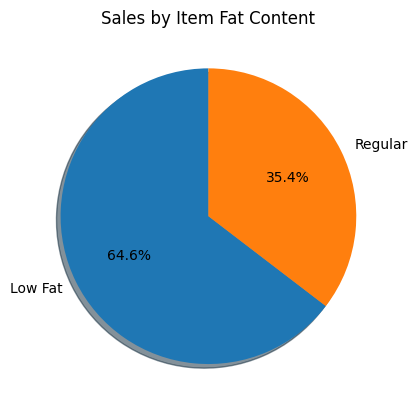

In [72]:
plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct='%1.1f%%',shadow = True,startangle=90)
plt.title('Sales by Item Fat Content')
plt.show()

**📈Insights:**   
This Pie chart shows how the Fat content in food Effect the sales . Low Fat Food has high sales, whereas Regular Fat food are sold less.

## 2️⃣ Sales of different Food Item by type

In this section, we analyze **total sales across different product categories** in Blinkit.  
By grouping sales data by `Item Type`, we can identify which categories drive the most revenue

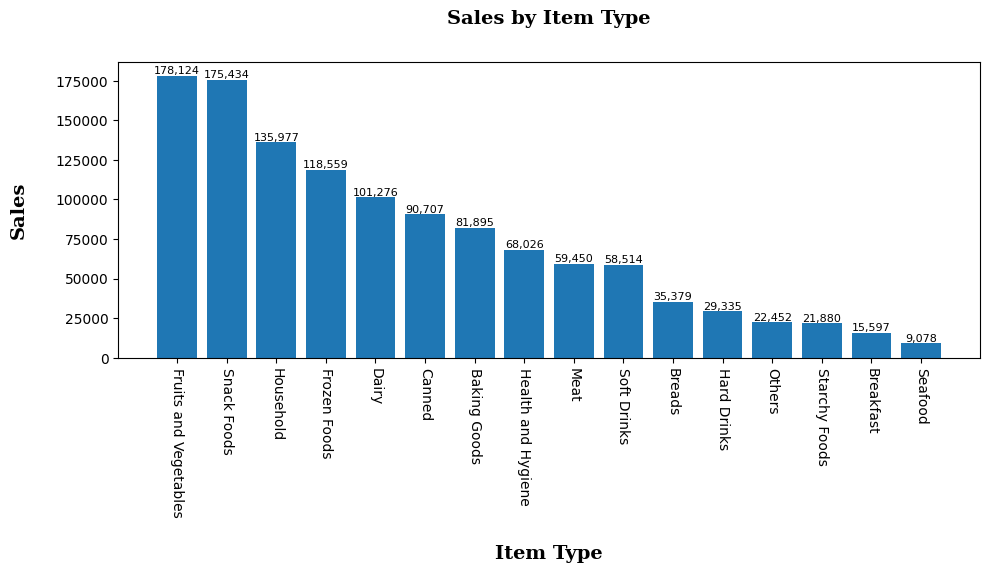

In [73]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending =False)

custom_font = {
    'family': 'serif',
    'weight': 'bold',
    'size': 14,
}

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)
plt.xticks(rotation=-90)
plt.xlabel('Item Type', labelpad = 20,fontdict=custom_font)
plt.ylabel('Sales', labelpad = 20,fontdict=custom_font)
plt.title('Sales by Item Type',y=1.1,fontdict=custom_font)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha='center', va='bottom',fontsize= 8)

plt.tight_layout()
plt.show()

📈 **Insight:**
- This visualization highlights which product categories generate the most revenue.  
- Categories at the **left/top** dominate sales (e.g., Fruits & Vegetables, Dairy), while those at the bottom contribute the least.

🔹 .unstack()

Works on a MultiIndex (row index with multiple levels).

It moves one of the levels of the row index into columns.

Often comes after groupby() (which creates a MultiIndex when grouping by multiple columns).


🔹 .pivot()

Used explicitly when you want to reshape data based on columns.

Requires you to specify:

index → what becomes rows

columns → what becomes new columns

values → what fills the table


Why .unstack() instead of .pivot()?

If you already did a groupby and have a MultiIndex result → .unstack() is faster and more natural.

.pivot() works better on raw/tabular data before grouping.

.unstack() avoids having to rewrite pivot(index=..., columns=..., values=...).

## 3️⃣ Sales by Item Fat Content across Outlet Location Types

This analysis compares **total sales performance** across different **Outlet Location Tiers** (`Outlet Location Type`)  
and categorizes them by **Item Fat Content** (Regular vs. Low Fat).  

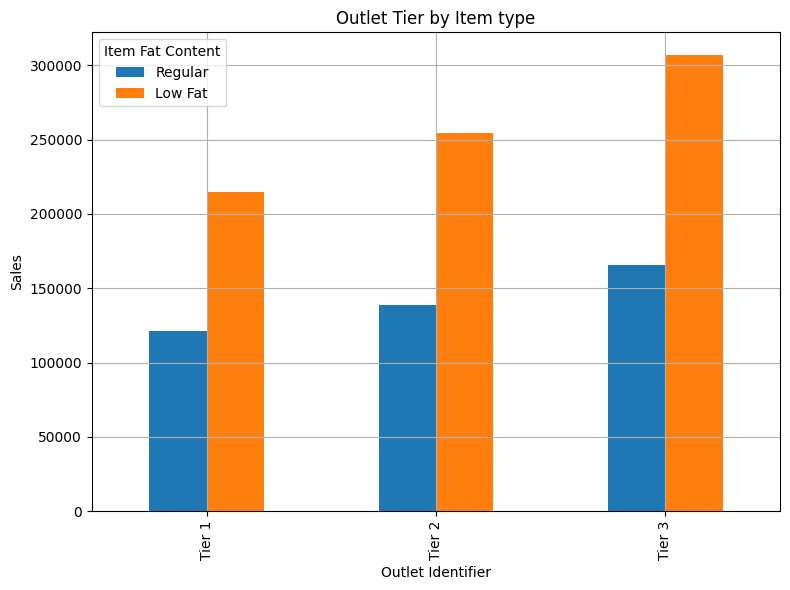

In [74]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped=  grouped[['Regular','Low Fat']]

grouped.plot(kind='bar', figsize=(8, 6), title = 'Outlet Tier by Item type' )
plt.xlabel('Outlet Identifier')
plt.ylabel('Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.grid()
plt.show()


**Insights:**
- Outlets in **Tier 3 locations** generate the **highest sales overall**, indicating stronger demand in those regions.  
- Across all tiers, **Regular fat items** consistently outperform **Low Fat items**, showing customer preference.  
- Tier 1 outlets underperform compared to Tier 2 and Tier 3, suggesting location has a direct impact on sales volume.  

## 4️⃣ Sales Trend by Outlet Establishment Year

This analysis examines how **total sales vary depending on the year when outlets were established**.  
It helps identify whether older or newer outlets contribute more to revenue.  

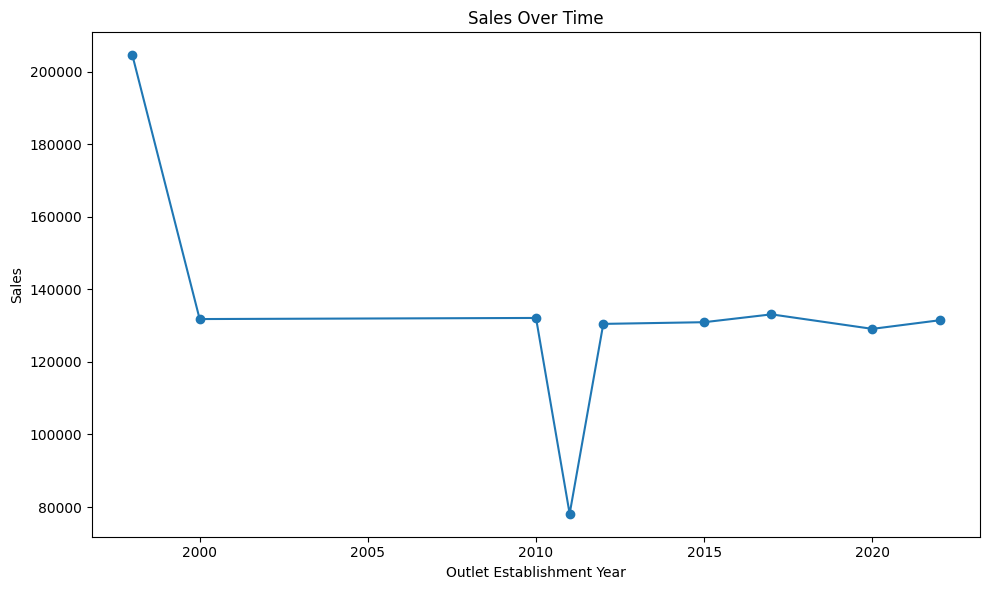

In [75]:
grouped = df.groupby(['Outlet Establishment Year'])['Sales'].sum().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped.values, marker='o', linestyle='-')
plt.title('Sales Over Time')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

**📈 Insights:**
- Outlets established in the **mid-1980s and early 2000s** show the strongest sales contribution.  
- More recently established outlets (after ~2005) tend to generate lower overall sales, possibly due to limited market presence or smaller outlet size.  
- This trend suggests that **older outlets have built stronger customer bases**, making them key drivers of revenue.  

## 5️⃣ Sales Distribution by Outlet Size

This chart illustrates the **proportion of total sales** contributed by outlets of different sizes (Small, Medium, High).  
A pie chart helps in visualizing the **relative share** of each outlet size in the overall revenue.  

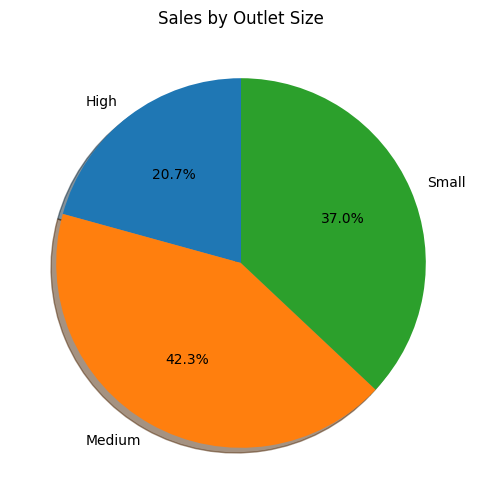

In [76]:
grouped = df.groupby(['Outlet Size'])['Sales'].sum()
plt.figure(figsize =(10,6))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%',shadow = True,startangle=90)
plt.title('Sales by Outlet Size')
plt.show()

📈 **Insights:**
- The **majority of sales** are generated by **Medium-sized outlets**, showing they are the backbone of Blinkit’s retail performance.  


# Combined Insights:

Total Sales: 12,01,681.48 k $

Average Sales: 140.99

Number of Items: 1559

Number of Stores: 10

Average Rating: 3.965857092573038

Average Visibility: 0.06613202877895108

Average Weight: 12.857645184135977

- **Item Type Performance**  
  - Certain categories (e.g., Fruits & Vegetables, Dairy, Snacks) dominate sales, while others (Seafood, Baking Goods) contribute minimally.  
  - Regular fat products consistently outperform Low Fat items in every outlet tier.  

- **Outlet Characteristics**  
  - **Medium-sized outlets** generate the highest sales share, followed by small outlets.  
  - Large outlets are underutilized and contribute the least to total revenue.  

- **Location Analysis**  
  - **Tier 3 outlets** lead in sales contribution, followed by Tier 2, with Tier 1 outlets trailing behind.  
  - This suggests Blinkit performs better in emerging markets compared to premium urban markets.  

- **Time Trends**  
  - Older outlets (established before 2000s) maintain stronger sales performance.  
  - Newer outlets (post-2005) show weaker sales, possibly due to smaller presence or shorter operating history.  

---

### 📌 Business Recommendations
- **Inventory & Category Strategy**  
  - Focus on scaling **high-performing categories** (Fruits, Dairy, Snacks).  
  - Introduce promotions or bundling for **low-performing categories** (Seafood, Baking Goods) to boost sales.  

- **Outlet Optimization**  
  - Prioritize **medium and small outlets**, as they generate maximum ROI.  
  - Investigate why **large outlets** underperform (e.g., high operational cost, location issues).  

- **Geographic Expansion**  
  - Expand aggressively in **Tier 2 & Tier 3 locations**, where demand and growth are stronger.  
  - Reassess strategy for **Tier 1 outlets**, possibly focusing on premium product lines.  

- **Long-Term Planning**  
  - Leverage the brand loyalty of **older outlets** by maintaining them as flagship stores.  
  - For newer outlets, invest in **local marketing and promotions** to build customer base.  
